### Load STRING DB version 12

In [1]:
from tqdm import tqdm
import pandas as pd

uniprot_file_path = "/vol/storage/artivir_data/HUMAN_9606_idmapping.dat"


uniprot_dat_file_content = [i.strip().split() for i in open(uniprot_file_path).readlines()]
string_and_gene_names = []
for item in uniprot_dat_file_content:
    if (item[1] == "Gene_Name") or (item[1] == "STRING"):
        string_and_gene_names.append(item)    

string_names_list = []
gene_names_list = []
for elem in tqdm(string_and_gene_names, desc="look for STRING protein ids corresponding to gene names in dataset"):
    if elem[1] == "STRING":
        for names in string_and_gene_names: # check if the uniprot name is the same
            if names[0] == elem[0] and names[1] == "Gene_Name":
                string_names_list.append(elem[2])
                gene_names_list.append(names[2])
                break     
        
string_to_gen_names_map = {"string_ids" : string_names_list, "gene_names" : gene_names_list}        
df_string_to_gen_names_map = pd.DataFrame(string_to_gen_names_map)
#df_string_to_gen_names_map.to_csv(data_path + 'df_string_to_gen_names_map.zip', index=False, compression = dict(method='zip',archive_name='df_string_to_gen_names_map.csv'))

look for STRING protein ids corresponding to gene names in dataset: 100%|██████████| 183790/183790 [01:07<00:00, 2713.60it/s] 


In [2]:
# read txt dataframe in pandas 
import pandas as pd
df_string = pd.read_csv("/vol/storage/artivir_data/9606.protein.links.full.v12.0.txt", sep=' ', header=0)

In [3]:
df_string.head()

,protein1,protein2,neighborhood,neighborhood_transferred,fusion,cooccurence,homology,coexpression,coexpression_transferred,experiments,experiments_transferred,database,database_transferred,textmining,textmining_transferred,combined_score
0,9606.ENSP00000000233,9606.ENSP00000356607,0,0,0,0,0,0,45,0,134,0,0,0,81,173
1,9606.ENSP00000000233,9606.ENSP00000427567,0,0,0,0,0,0,0,0,128,0,0,0,70,154
2,9606.ENSP00000000233,9606.ENSP00000253413,0,0,0,0,0,49,111,0,49,0,0,0,69,151
3,9606.ENSP00000000233,9606.ENSP00000493357,0,0,0,0,0,56,0,0,53,0,0,433,81,471
4,9606.ENSP00000000233,9606.ENSP00000324127,0,0,0,0,0,0,0,0,46,0,0,153,91,201


In [4]:
mapped_gene_ids = df_string_to_gen_names_map["string_ids"].unique()
string_gene_ids = df_string["protein1"].unique()

In [5]:
# check how many string_gene_ids are mapped
count = 0
for i in string_gene_ids:
    if i in mapped_gene_ids:
        count += 1
print(count, "out of", len(string_gene_ids), "string gene ids are mapped to gene names")

19005 out of 19622 string gene ids are mapped to gene names


In [26]:
len(df_string[df_string['combined_score'] > 100])

13715404

In [34]:
df_string_to_gen_names_map

,gene_names
string_ids,
9606.ENSP00000361930,YWHAB
9606.ENSP00000264335,YWHAE
9606.ENSP00000248975,YWHAH
9606.ENSP00000306330,YWHAG
9606.ENSP00000340989,SFN
...,...
9606.ENSP00000361400,SFTPA2
9606.ENSP00000388552,RBM14-RBM4
9606.ENSP00000477654,C18orf54


In [6]:

df_string_to_gen_names_map.set_index('string_ids', inplace=True)

df_merged_1 = pd.merge(df_string, df_string_to_gen_names_map, left_on='protein1', right_index=True, how='left')
df_merged_1.rename(columns={'gene_names': 'gene_name_1'}, inplace=True)

df_merged_2 = pd.merge(df_string, df_string_to_gen_names_map, left_on='protein2', right_index=True, how='left')
df_merged_2.rename(columns={'gene_names': 'gene_name_2'}, inplace=True)

df_string['gene_name_1'] = df_merged_1['gene_name_1']
df_string['gene_name_2'] = df_merged_2['gene_name_2']

df_string.fillna('nan', inplace=True)

In [60]:
# save df_string in a file 
df_string.to_csv("/vol/storage/artivir_data/df_string_ppi_complete_v12_updated.csv", index=False, compression = dict(method='zip',archive_name='df_string_ppi_complete_v12_updated.csv'))

In [7]:
index = 11002546
protein1 = df_string.iloc[index]['protein1']
protein2 = df_string.iloc[index]['protein2']
print(protein1)
print(protein2)
print(df_string_to_gen_names_map.loc[protein1]['gene_names'])
print(df_string_to_gen_names_map.loc[protein1]['gene_names'] == df_string.iloc[index]['gene_name_1'])

print(df_string_to_gen_names_map.loc[protein2]['gene_names'])
print(df_string_to_gen_names_map.loc[protein2]['gene_names'] == df_string.iloc[index]['gene_name_2'])

9606.ENSP00000406541
9606.ENSP00000395535
C11orf21
True
MECP2
True


In [8]:
df_string.head()

,protein1,protein2,neighborhood,neighborhood_transferred,fusion,cooccurence,homology,coexpression,coexpression_transferred,experiments,experiments_transferred,database,database_transferred,textmining,textmining_transferred,combined_score,gene_name_1,gene_name_2
0,9606.ENSP00000000233,9606.ENSP00000356607,0,0,0,0,0,0,45,0,134,0,0,0,81,173,ARF5,RALGPS2
1,9606.ENSP00000000233,9606.ENSP00000427567,0,0,0,0,0,0,0,0,128,0,0,0,70,154,ARF5,FHDC1
2,9606.ENSP00000000233,9606.ENSP00000253413,0,0,0,0,0,49,111,0,49,0,0,0,69,151,ARF5,ATP6V1E1
3,9606.ENSP00000000233,9606.ENSP00000493357,0,0,0,0,0,56,0,0,53,0,0,433,81,471,ARF5,CYTH2
4,9606.ENSP00000000233,9606.ENSP00000324127,0,0,0,0,0,0,0,0,46,0,0,153,91,201,ARF5,PSD3


In [14]:
df_string["gene_name_1"] = df_string["gene_name_1"].str.lower()
df_string["gene_name_2"] = df_string["gene_name_2"].str.lower()

In [59]:
import numpy as np
df_string["combined_score"] /= 1000
df_string = df_string[df_string["combined_score"] > 0.5]
df_string.reset_index(drop = True, inplace = True)
print("The number of connections is " + str(len(df_string)))
        
randomized_gene_list = df_string["gene_name_1"].unique() #this operation preserve the original order, it can also be randomized with np.random.permutation

gene_indices_dict = {gene_name: index for index, gene_name in enumerate(randomized_gene_list)}
gene_name_1_array = df_string["gene_name_1"].values
gene_name_2_array = df_string["gene_name_2"].values

combined_score_array = df_string["combined_score"]
edge_index_0 = []
edge_index_1 = []
edge_weight = []
for gene_1, gene_2, score in tqdm(zip(gene_name_1_array, gene_name_2_array, combined_score_array)):
    edge_index_0.append(gene_indices_dict[gene_1])
    edge_index_1.append(gene_indices_dict[gene_2])
    edge_weight.append(score)

network = {"edge_index_0": edge_index_0, "edge_index_1": edge_index_1, "edge_weight": edge_weight}


The number of connections is 1133152


1133152it [00:01, 1128285.18it/s]


In [60]:
from torch_geometric.data import Data
data = Data()
import torch

data.edge_index = torch.Tensor([network['edge_index_0'], network['edge_index_1']]).long()
data.edge_weight = torch.Tensor(network['edge_weight'])
data.num_nodes = len(randomized_gene_list)
data.node_names = randomized_gene_list


In [61]:
len(data.node_names) - data.edge_index[0].unique().size(0)

0

In [64]:
len(randomized_gene_list)

18768

In [63]:
from torch_geometric.utils import degree

deg = degree(data.edge_index[0], data.num_nodes)
deg[1000]  # degree of node 0

tensor(326.)

### load best model from optuna

In [9]:
import optuna
#Load best model: /vol/storage/GhostFreePro/GNN/best_models/transcriptome-proteome-effectome-interactome_2024-03-15_14_54_17_459133_8505_best_model.pt
all_omics_pna = optuna.load_study(study_name='my_study', storage='sqlite:////vol/storage/GhostFreePro/GNN/gcn_random_searches/transcriptome-proteome-effectome-interactome_is_positional_encoding_False_MPNN_pretraining_cv_2024-03-15_9_28_31_PNA_fine_tuned.db')


/vol/storage/miniconda3/envs/pyg_gpu/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [74]:
drug_targets_inferred = ["MAPK11","STAT1","TREML4","SMAD1", "FOS","TBK1", "TICAM1", "JUN", "ARL6IP6", "TBK1","RELA", "CASP7","IKBKE","NFKB1","LNPEP","IRF3","STAT2","HMOX1","ATF4","IRF9","FADD","ATF6","BACH1","AKT1",
"MBTPS1","TBP","ALG5","TP53","TCF12","AGTR1","AGTR2","STAT3","IFIH1","EGFR","ISG5","OAS1","KEAP1","JUND",
"OAS2","CUL3","AHR","OAS3","FOSL1","IRF7","MAS1","BAX","RBX1","IFNB1","TLR9","TLR7"]
drug_targets_inferred = [i.lower() for i in drug_targets_inferred]

In [11]:
import numpy as np
antiviral_drug_targets = np.array(['gnrhr', 'oprd1', 'chrm3', 'hrh4', 'htr3b', 'itgav', 'kcnh2',
       'thra', 'oprk1', 'ntrk2', 'slc6a1', 'kit', 'htr6', 'scnn1g',
       'chrm1', 'scn11a', 'htr1e', 'f2', 'htr3c', 'htr1f', 'kcnh7',
       'esr2', 'gsto2', 'scnn1b', 'scnn1a', 'htr4', 'grin3a', 'nr1i3',
       'f2', 'gsto1', 'abl1', 'scnn1d', 'shbg', 'htr3d', 'chrm5', 'kcnq3',
       'noxo1', 'gstp1', 'pomc', 'ppara', 'gabrr2', 'oprm1', 'dhfr',
       'chrm2', 'htr3e', 'chrm4', 'scn5a', 'gabrr1', 'mttp', 'ntrk1',
       'itgb3', 'kcnh6', 'gabrr3'])

In [12]:
import pandas as pd
import numpy as np
functionally_validated_host_factors = np.load("/vol/storage/GhostFreePro/data_preprocessing_pipeline/artivir_data/strong_functionally_validated_host_factors.npy")
functionally_validated_host_factors = np.array([gene.lower() for gene in functionally_validated_host_factors])
# read host factors from publications
host_factors = pd.ExcelFile("/vol/storage/GhostFreePro/data_preprocessing_pipeline/artivir_data/host_factors_from_publications.xlsx")
host_factors_dfs = {sheet_name: host_factors.parse(sheet_name) for sheet_name in host_factors.sheet_names}
potential_host_factors_list = host_factors_dfs["host_factors"]["Gene name"].str.lower().unique()
potential_host_factors_list = np.array([gene for gene in potential_host_factors_list if gene not in functionally_validated_host_factors])

In [75]:
indices_functionally_validated_host_factors = [gene_indices_dict[gene] for gene in functionally_validated_host_factors if gene in randomized_gene_list]
indices_potential_host_factors = [gene_indices_dict[gene] for gene in potential_host_factors_list if gene in randomized_gene_list]
indices_drug_targets = [gene_indices_dict[gene] for gene in drug_targets_inferred if gene in randomized_gene_list]
indices_antiviral_drug_targets = [gene_indices_dict[gene] for gene in antiviral_drug_targets if gene in randomized_gene_list]

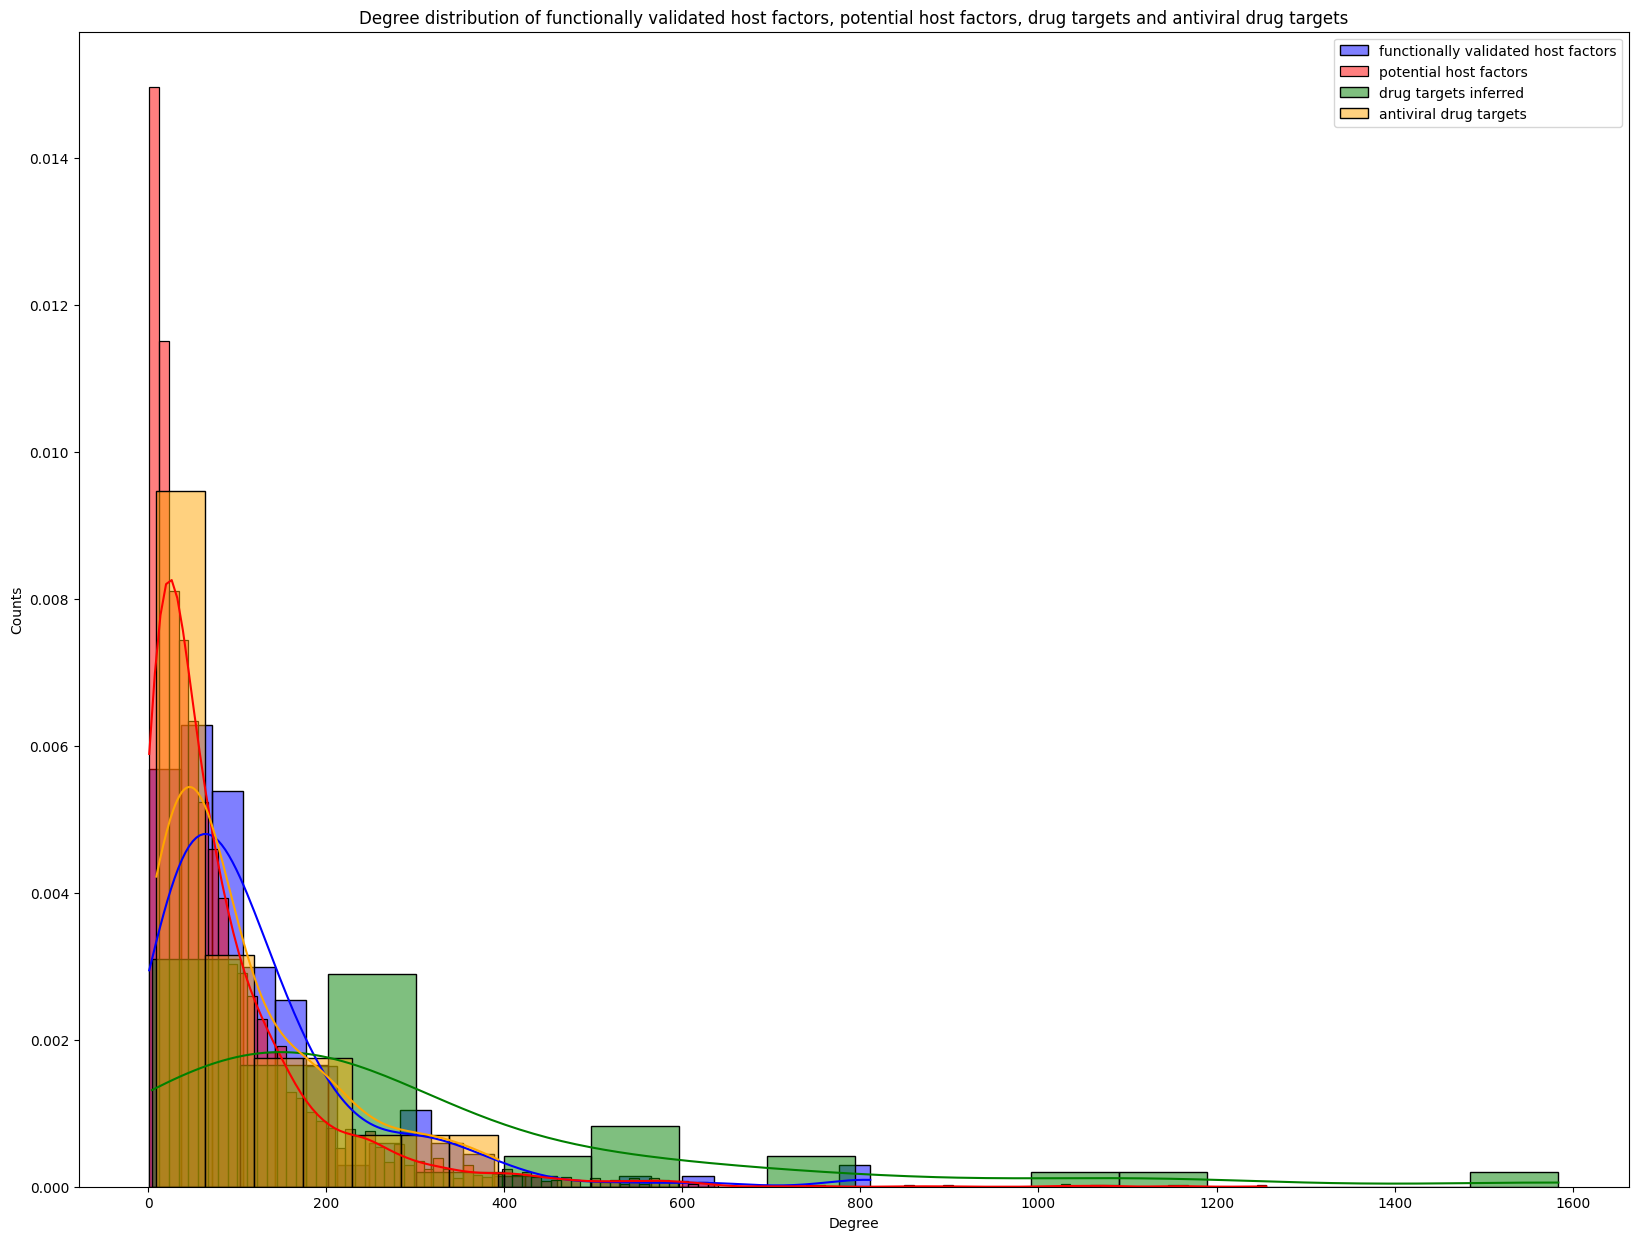

In [78]:
# compute degrees distributions of functionally validated host factors, potential host factors, drug targets and antiviral drug targets and plot the results 
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots()
# set size
fig.set_size_inches(20, 15)
# plot histograms with normalized counts 
sns.histplot(deg[indices_functionally_validated_host_factors], color = "blue", label = "functionally validated host factors", ax = ax, kde = True, stat='density')
sns.histplot(deg[indices_potential_host_factors], color = "red", label = "potential host factors", ax = ax, kde = True, stat='density')
sns.histplot(deg[indices_drug_targets], color = "green", label = "drug targets inferred", ax = ax, kde = True, stat='density')
sns.histplot(deg[indices_antiviral_drug_targets], color = "orange", label = "antiviral drug targets", ax = ax, kde = True, stat='density')

ax.set_xlabel("Degree")
ax.set_ylabel("Counts")

# set title
plt.title("Degree distribution of functionally validated host factors, potential host factors, drug targets and antiviral drug targets")
plt.legend()
plt.show()

In [81]:
all_omics_pna.best_trial.user_attrs.keys()

dict_keys(['aupr_results', 'aupr_results_dt', 'auroc_results', 'auroc_results_dt', 'node_names', 'positive_dg', 'positive_dt', 'preds cv: 0', 'preds cv: 1', 'preds cv: 2', 'preds cv: 3', 'preds cv: 4', 'preds_dt cv: 0', 'preds_dt cv: 1', 'preds_dt cv: 2', 'preds_dt cv: 3', 'preds_dt cv: 4', 'random_seed', 'test_mask dg_0', 'test_mask dg_1', 'test_mask dg_2', 'test_mask dg_3', 'test_mask dg_4', 'test_mask dg_ft_0', 'test_mask dg_ft_1', 'test_mask dg_ft_2', 'test_mask dg_ft_3', 'test_mask dg_ft_4', 'train_loss_0', 'train_loss_1', 'train_loss_2', 'train_loss_3', 'train_loss_4', 'train_mask dg_0', 'train_mask dg_1', 'train_mask dg_2', 'train_mask dg_3', 'train_mask dg_4', 'train_mask dg_ft_0', 'train_mask dg_ft_1', 'train_mask dg_ft_2', 'train_mask dg_ft_3', 'train_mask dg_ft_4', 'val_loss_0', 'val_loss_1', 'val_loss_2', 'val_loss_3', 'val_loss_4'])

In [87]:
pna_gene_names = np.array(all_omics_pna.best_trial.user_attrs["node_names"])
positive_dg = np.array(all_omics_pna.best_trial.user_attrs["positive_dg"])
positive_dt = np.array(all_omics_pna.best_trial.user_attrs["positive_dt"])

In [86]:
preds = np.mean([all_omics_pna.best_trial.user_attrs[f"preds cv: {i}"] for i in range(5)], axis=0)
preds_dt = np.mean([all_omics_pna.best_trial.user_attrs[f"preds_dt cv: {i}"] for i in range(5)], axis=0)

In [107]:
# preds indices where eprop > 0.95
preds_indices = np.where(preds > 0.9)[0]
high_predicted_gene_indices = np.where(preds > 0.95)[0]
# dt preds indices where prob > 0.85
preds_dt_indices = np.where(preds_dt > 0.75)[0]
# intersection of preds_indices and preds_dt_indices
indices = np.intersect1d(preds_indices, preds_dt_indices)

In [108]:
candidates_genes = pna_gene_names[indices]
hf_predicted_genes = pna_gene_names[high_predicted_gene_indices]

In [109]:
candidates_genes_filtered = [gene for gene in candidates_genes if gene not in functionally_validated_host_factors]
hf_predicted_genes_filtered = [gene for gene in hf_predicted_genes if gene not in functionally_validated_host_factors]

In [139]:
np.array(candidates_genes_filtered)

array(['mapk1', 'lnpep', 'map3k10', 'abcb7', 'hacd3', 'atp6v0a1', 'scyl1',
       'glud1', 'rptor', 'adcy6', 'mccc2', 'golga4', 'atp6v1h', 'ergic2',
       'aldh18a1', 'ece1', 'atp2b1', 'adcy5', 'gpx8', 'nceh1', 'tpcn1',
       'hmox2'], dtype='<U8')

In [140]:
np.array(hf_predicted_genes_filtered)

array(['gabarapl2', 'psma4', 'vamp3', 'rcn1', 'psmc4', 'tnfrsf1a',
       'golga5', 'hsd17b10', 'timm21', 'itgb4', 'psmd8', 'psma3',
       'sptlc2', 'eif5', 'pck2', 'pygb', 'eef1a2', 'psmd7', 'stub1',
       'cdipt', 'vps18', 'bet1', 'nampt', 'ykt6', 'sec61b', 'gosr1',
       'ccdc47', 'cd38', 'nup107', 'nup155', 'eif1b', 'msh2', 'apob',
       'snx17', 'gorasp2', 'tmem59', 'vamp4', 'rpn2', 'tardbp', 'sec61a1',
       'rab9b', 'mrps7', 'nup85', 'sympk', 'trap1', 'canx', 'copb1',
       'lman1', 'exoc4', 'fus', 'lgals3', 'dnajb1', 'trim21', 'eefsec',
       'eral1', 'hspbp1', 'kras', 'eif2s1', 'sort1', 'notch2', 'arf3',
       'stx6', 'igf2bp3', 'ddx56', 'uggt1', 'ecpas', 'stx17', 'psmb7',
       'derl1', 'adam10', 'preb', 'lrpprc', 'psmc1', 'lmnb1', 'nup133',
       'ube2k', 'psma6', 'usp14', 'utp6', 'psmd11', 'cdh1', 'glce',
       'snx1', 'rab11a', 'faf2', 'rbm25', 'spag9', 'atp5f1b', 'mcm4',
       'psmb1', 'tram1', 'tmed2', 'vmp1', 'slc12a2', 'sptlc1', 'vamp7',
       'ehd2', 'nap

In [111]:
intersection = np.intersect1d(candidates_genes_filtered, hf_predicted_genes_filtered)
intersection

array(['atp6v1h', 'ergic2', 'gpx8', 'mccc2'], dtype='<U10')

In [136]:
# plot degrees of the predicted genes
indices_predicted_candidates = [gene_indices_dict[gene] for gene in candidates_genes_filtered if gene in randomized_gene_list]
indices_predicted_hf = [gene_indices_dict[gene] for gene in hf_predicted_genes_filtered if gene in  randomized_gene_list]
indices_positive_dg = [gene_indices_dict[gene] for gene in pna_gene_names[positive_dg.astype(bool)] if gene in randomized_gene_list]
indices_positive_dt = [gene_indices_dict[gene] for gene in pna_gene_names[positive_dt.astype(bool)] if gene in randomized_gene_list]

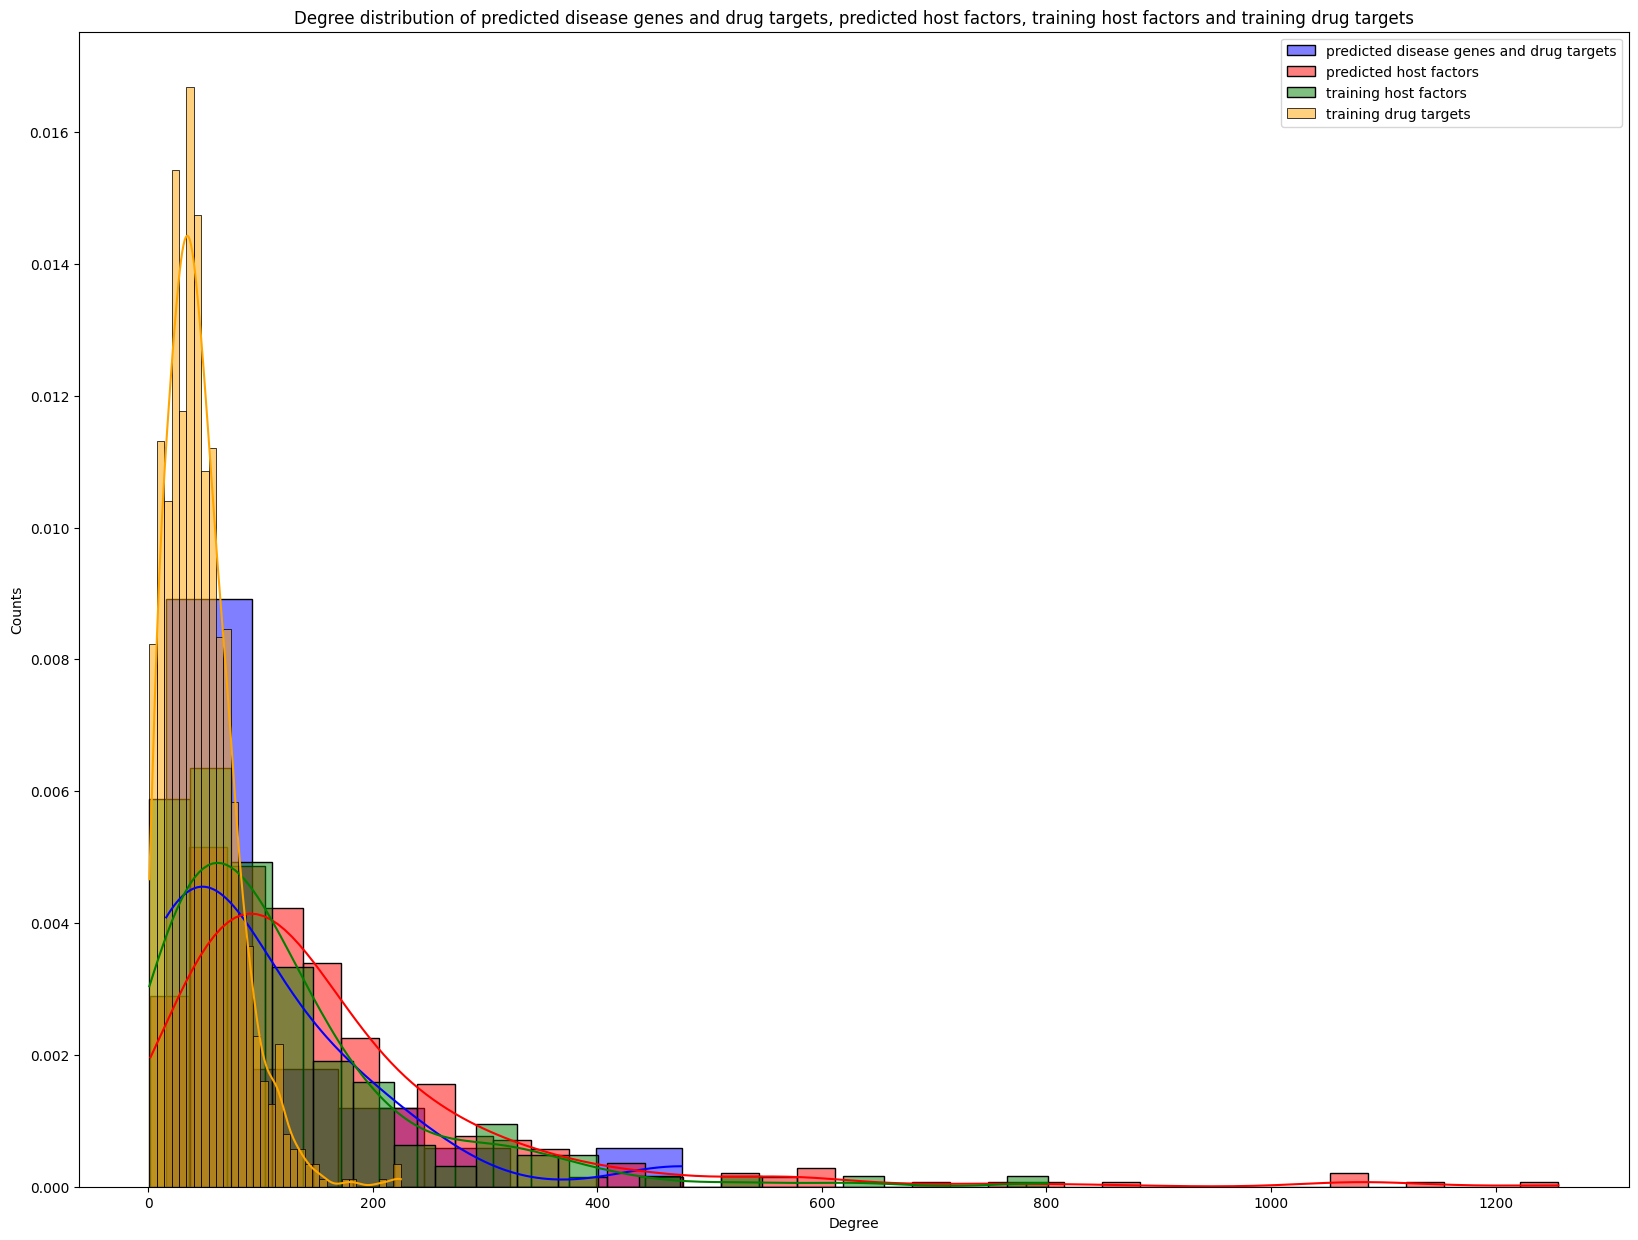

In [137]:
# compute degrees distributions of functionally validated host factors, potential host factors, drug targets and antiviral drug targets and plot the results 
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots()
# set size
fig.set_size_inches(20, 15)
# plot histograms with normalized counts 
sns.histplot(deg[indices_predicted_candidates], color = "blue", label = "predicted disease genes and drug targets", ax = ax, kde = True, stat='density')
sns.histplot(deg[indices_predicted_hf], color = "red", label = "predicted host factors", ax = ax, kde = True, stat='density')
sns.histplot(deg[indices_positive_dg], color = "green", label = "training host factors", ax = ax, kde = True, stat='density')
sns.histplot(deg[indices_positive_dt], color = "orange", label = "training drug targets", ax = ax, kde = True, stat='density')

ax.set_xlabel("Degree")
ax.set_ylabel("Counts")

# set title
plt.title("Degree distribution of predicted disease genes and drug targets, predicted host factors, training host factors and training drug targets")
plt.legend()
plt.show()